In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [4]:
# Merged Data
m_data_path = "https://raw.githubusercontent.com/nhakkarainen/NU-Project-1/main/Resources/merged_data.csv" 
m_data = pd.read_csv(m_data_path)
m_data.head()

,Unnamed: 0,COMPLAINT ID,COMPLAINT TYPE,ADDRESS,Neighborhood,STREET NUMBER FROM,STREET NUMBER TO,DIRECTION,STREET NAME,STREET TYPE,...,LONGITUDE,LOCATION,Community Area Number,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,0,DOECOMP29999,Air Pollution Work Order,"700 E 107TH ST, CHICAGO, IL",Pullman,700,NaN,E,107TH,ST,...,NaN,NaN,50.0,1.5,21.6,22.8,13.1,38.6,20588,51.0
1,1,DOECOMP29998,Air Pollution Work Order,"700 E 107TH ST, CHICAGO, IL",Pullman,700,NaN,E,107TH,ST,...,NaN,NaN,50.0,1.5,21.6,22.8,13.1,38.6,20588,51.0
2,2,DOECOMP30000,Air Pollution Work Order,"700 E 107TH ST, CHICAGO, IL",Pullman,700,NaN,E,107TH,ST,...,NaN,NaN,50.0,1.5,21.6,22.8,13.1,38.6,20588,51.0
3,3,DOECOMP1839,Air Pollution Work Order,"11436 S FORRESTVILLE AVE, CHICAGO, IL",Pullman,11436,NaN,S,FORRESTVILLE,AVE,...,NaN,NaN,50.0,1.5,21.6,22.8,13.1,38.6,20588,51.0
4,4,DOECOMP8772,Air Pollution Work Order,"2019 W 111TH ST, CHICAGO, IL",Morgan Park,2019,NaN,W,111TH,ST,...,NaN,NaN,75.0,0.8,13.2,15.0,10.8,40.3,27149,30.0


In [46]:
# CMAP Data
cmap_data_path = "https://raw.githubusercontent.com/nhakkarainen/NU-Project-1/main/Resources/2010%20CMAP%20Data.csv"
cmap_data = pd.read_csv(cmap_data_path)
cmap_data = cmap_data.dropna(axis = 'columns')
cmap_data

,Geog,GeogKey,Total Population,"Not Hispanic or Latino, White alone","Not Hispanic or Latino, Black or African American alone","Not Hispanic or Latino, American Indian and Alaska Native alone","Not Hispanic or Latino, Asian alone","Not Hispanic or Latino, Native Hawaiian and Other Pacific Islander alone","Not Hispanic or Latino, Some Other Race alone","Not Hispanic or Latino, Two or More Races",...,Median Age,Total Households,Average Household Size,Total Housing Units,Occupied Housing Units,Vacant Housing Units,Occupied Housing Units.1,Owned with a mortgage or a loan,Owned free and clear,Renter occupied
0,Rogers Park,1,54991,21618,14461,142,3523,39,202,1573,...,32.4,24292,2.13,27564,24292,3272,24292,6128,1009,17155
1,West Ridge,2,71942,30706,8015,189,16184,3,225,1919,...,35.1,24755,2.85,27466,24755,2711,24755,8829,3367,12559
2,Uptown,3,56362,29098,11275,191,6414,10,130,1235,...,35.5,29719,1.79,32541,29719,2822,29719,8298,1230,20191
3,Lincoln Square,4,39493,24916,1488,72,4399,11,128,917,...,33.5,18194,2.14,19906,18194,1712,18194,5482,1406,11306
4,North Center,5,31867,24634,738,55,1449,16,51,594,...,32.5,14561,2.18,16197,14561,1636,14561,5805,1147,7609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Washington Heights,73,26493,121,25793,36,12,4,18,251,...,41.2,9482,2.77,10365,9482,883,9482,4626,1921,2935
73,Mount Greenwood,74,19093,16413,987,34,126,3,6,142,...,36.1,6990,2.63,7374,6990,384,6990,4440,1555,995
74,Morgan Park,75,22544,6473,15039,11,92,8,24,278,...,40.5,8187,2.70,8958,8187,771,8187,4400,1534,2253
75,O'Hare,76,12756,9845,403,15,1058,2,24,197,...,36.6,6127,2.08,6677,6127,550,6127,1843,881,3403


In [47]:
# Renaming CMAP columns
cmap_data = cmap_data.rename(columns= {'Geog' : 'Neighborhood', 
                                       'Not Hispanic or Latino, White alone' : 'White', 
                                       'Not Hispanic or Latino, Black or African American alone' : 'Black or African American',
                                       'Not Hispanic or Latino, American Indian and Alaska Native alone' : 'American Indian and Alaska Native',
                                       'Not Hispanic or Latino, Asian alone' : 'Asian',
                                       'Not Hispanic or Latino, Native Hawaiian and Other Pacific Islander alone' : 'Native Hawaiian and Other Pacific Islander',
                                       'Not Hispanic or Latino, Some Other Race alone' : 'Other',
                                       'Not Hispanic or Latino, Two or More Races' : 'Two or more Races'})

In [49]:
cmap_data['Minority Percentage'] = (cmap_data['White'] / cmap_data['Total Population'])
cmap_data['Minority Percentage'] = pd.Series(['{0:.2f}%'.format((1-val) * 100) for val in cmap_data['Minority Percentage'] ],
                                                           index = cmap_data.index)
cmap_data

,Neighborhood,GeogKey,Total Population,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Other,Two or more Races,...,Total Households,Average Household Size,Total Housing Units,Occupied Housing Units,Vacant Housing Units,Occupied Housing Units.1,Owned with a mortgage or a loan,Owned free and clear,Renter occupied,Minority Percentage
0,Rogers Park,1,54991,21618,14461,142,3523,39,202,1573,...,24292,2.13,27564,24292,3272,24292,6128,1009,17155,60.69%
1,West Ridge,2,71942,30706,8015,189,16184,3,225,1919,...,24755,2.85,27466,24755,2711,24755,8829,3367,12559,57.32%
2,Uptown,3,56362,29098,11275,191,6414,10,130,1235,...,29719,1.79,32541,29719,2822,29719,8298,1230,20191,48.37%
3,Lincoln Square,4,39493,24916,1488,72,4399,11,128,917,...,18194,2.14,19906,18194,1712,18194,5482,1406,11306,36.91%
4,North Center,5,31867,24634,738,55,1449,16,51,594,...,14561,2.18,16197,14561,1636,14561,5805,1147,7609,22.70%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Washington Heights,73,26493,121,25793,36,12,4,18,251,...,9482,2.77,10365,9482,883,9482,4626,1921,2935,99.54%
73,Mount Greenwood,74,19093,16413,987,34,126,3,6,142,...,6990,2.63,7374,6990,384,6990,4440,1555,995,14.04%
74,Morgan Park,75,22544,6473,15039,11,92,8,24,278,...,8187,2.70,8958,8187,771,8187,4400,1534,2253,71.29%
75,O'Hare,76,12756,9845,403,15,1058,2,24,197,...,6127,2.08,6677,6127,550,6127,1843,881,3403,22.82%


In [50]:
race_data = cmap_data.iloc[:, [0, 3,4,5,6,7,8,9,10,67]]
race_data.sort_values('Neighborhood')

,Neighborhood,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Other,Two or more Races,Hispanic or Latino,Minority Percentage
13,Albany Park,15054,2076,119,7430,22,159,1195,25487,70.79%
56,Archer Heights,2874,130,15,138,0,11,43,10182,78.54%
33,Armour Square,1642,1419,4,9721,1,2,138,464,87.74%
69,Ashburn,6251,18976,45,276,1,26,374,15132,84.78%
70,Auburn Gresham,134,47661,81,33,2,24,349,459,99.73%
...,...,...,...,...,...,...,...,...,...,...
64,West Lawn,4924,1390,28,210,3,18,113,26669,85.24%
52,West Pullman,166,27593,45,14,2,13,309,1509,99.44%
1,West Ridge,30706,8015,189,16184,3,225,1919,14701,57.32%
23,West Town,47051,6404,121,3106,28,160,1465,23901,42.79%


In [51]:
# Combining Data Sets
demo_data = pd.merge(m_data, race_data, on = 'Neighborhood')
demo_data

,Unnamed: 0,COMPLAINT ID,COMPLAINT TYPE,ADDRESS,Neighborhood,STREET NUMBER FROM,STREET NUMBER TO,DIRECTION,STREET NAME,STREET TYPE,...,HARDSHIP INDEX,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Other,Two or more Races,Hispanic or Latino,Minority Percentage
0,0,DOECOMP29999,Air Pollution Work Order,"700 E 107TH ST, CHICAGO, IL",Pullman,700,NaN,E,107TH,ST,...,51.0,522,6122,8,5,0,8,89,571,92.87%
1,1,DOECOMP29998,Air Pollution Work Order,"700 E 107TH ST, CHICAGO, IL",Pullman,700,NaN,E,107TH,ST,...,51.0,522,6122,8,5,0,8,89,571,92.87%
2,2,DOECOMP30000,Air Pollution Work Order,"700 E 107TH ST, CHICAGO, IL",Pullman,700,NaN,E,107TH,ST,...,51.0,522,6122,8,5,0,8,89,571,92.87%
3,3,DOECOMP1839,Air Pollution Work Order,"11436 S FORRESTVILLE AVE, CHICAGO, IL",Pullman,11436,NaN,S,FORRESTVILLE,AVE,...,51.0,522,6122,8,5,0,8,89,571,92.87%
4,4,DOECOMP8772,Air Pollution Work Order,"2019 W 111TH ST, CHICAGO, IL",Morgan Park,2019,NaN,W,111TH,ST,...,30.0,6473,15039,11,92,8,24,278,619,71.29%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,243,DOECOMP31879,Air Pollution Work Order,"7600 S SEELEY AVE, CHICAGO, IL",Auburn Gresham,7600,NaN,S,SEELEY,AVE,...,74.0,134,47661,81,33,2,24,349,459,99.73%
235,244,DOECOMP32306,Air Pollution Work Order,"7901 S WENTWORTH AVE, CHICAGO, IL",Auburn Gresham,7901,NaN,S,WENTWORTH,AVE,...,74.0,134,47661,81,33,2,24,349,459,99.73%
236,245,DOECOMP32307,Air Pollution Work Order,"7901 S WENTWORTH AVE, CHICAGO, IL",Auburn Gresham,7901,NaN,S,WENTWORTH,AVE,...,74.0,134,47661,81,33,2,24,349,459,99.73%
237,246,DOECOMP35677,Air Pollution Work Order,"13000 S TORRENCE AVE, CHICAGO, IL",South Deering,13000,NaN,S,TORRENCE,AVE,...,65.0,725,9354,31,18,1,15,156,4809,95.20%


In [52]:
neighborhood_df = demo_data['Neighborhood']
neighborhood_df = neighborhood_df.drop_duplicates()

In [53]:
hood_data = demo_data.groupby(by= 'Neighborhood')
count_df = hood_data.count()
count_df

,Unnamed: 0,COMPLAINT ID,COMPLAINT TYPE,ADDRESS,STREET NUMBER FROM,STREET NUMBER TO,DIRECTION,STREET NAME,STREET TYPE,INSPECTOR,...,HARDSHIP INDEX,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Other,Two or more Races,Hispanic or Latino,Minority Percentage
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Albany Park,4,4,4,4,4,0,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Archer Heights,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Ashburn,4,4,4,4,4,0,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Auburn Gresham,4,4,4,4,4,0,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Austin,4,4,4,4,4,0,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Avalon Park,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Avondale,5,5,5,5,5,0,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
Belmont Cragin,2,2,2,2,2,1,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Beverly,4,4,4,4,4,0,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


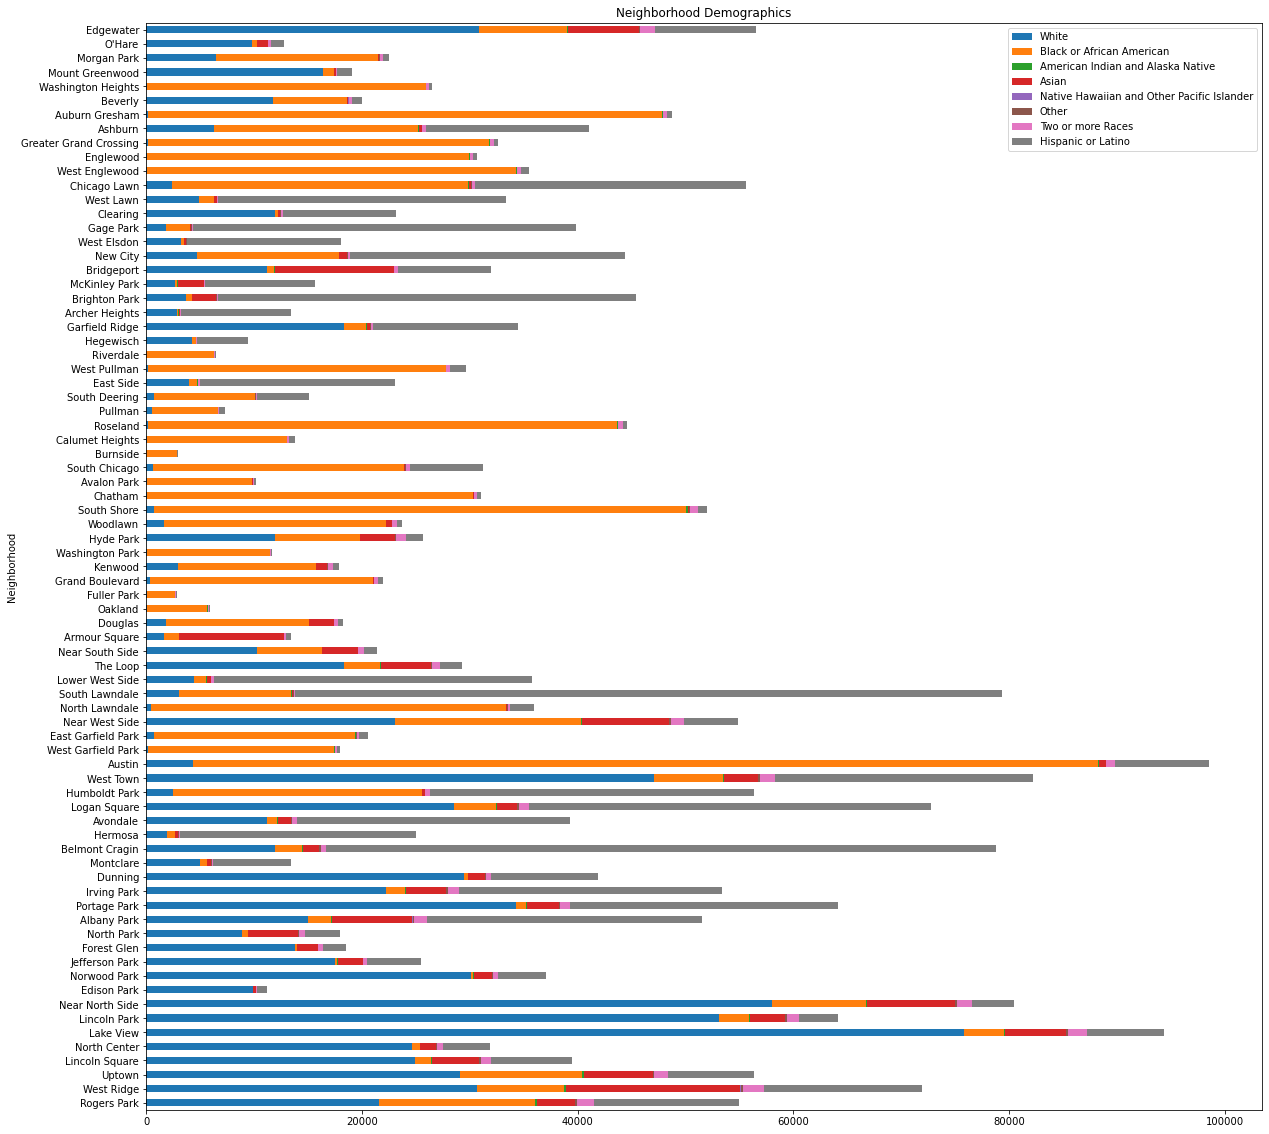

In [41]:
# Neighborhood Demogrphic breakdown
ax = race_data.plot.barh(x="Neighborhood", stacked = True, figsize = (20,20), xlabel = 'Neighborhood', title = 'Neighborhood Demographics')

In [31]:
complaint_df = count_df['COMPLAINT ID']
complaint_df

Neighborhood
Albany Park                4
Archer Heights             1
Ashburn                    4
Auburn Gresham             4
Austin                     4
Avalon Park                1
Avondale                   5
Belmont Cragin             2
Beverly                    4
Bridgeport                 1
Brighton Park              4
Calumet Heights            2
Chatham                    9
Chicago Lawn               1
Clearing                   2
Douglas                    5
Dunning                    8
East Garfield Park         4
East Side                  1
Edgewater                  6
Edison Park                1
Englewood                  4
Gage Park                  3
Greater Grand Crossing     6
Hegewisch                  2
Hyde Park                  5
Irving Park                6
Jefferson Park             5
Kenwood                    2
Lake View                  7
Lincoln Park               6
Lincoln Square             3
Logan Square               7
Lower West Side            6
M

In [54]:
chart_data = pd.merge(complaint_df, race_data, on = 'Neighborhood')
chart_data = chart_data.iloc[: , [0,1,10]]
chart_data

,Neighborhood,COMPLAINT ID,Minority Percentage
0,Albany Park,4,70.79%
1,Archer Heights,1,78.54%
2,Ashburn,4,84.78%
3,Auburn Gresham,4,99.73%
4,Austin,4,95.57%
5,Avalon Park,1,99.20%
6,Avondale,5,71.56%
7,Belmont Cragin,2,84.81%
8,Beverly,4,41.18%
9,Bridgeport,1,64.90%


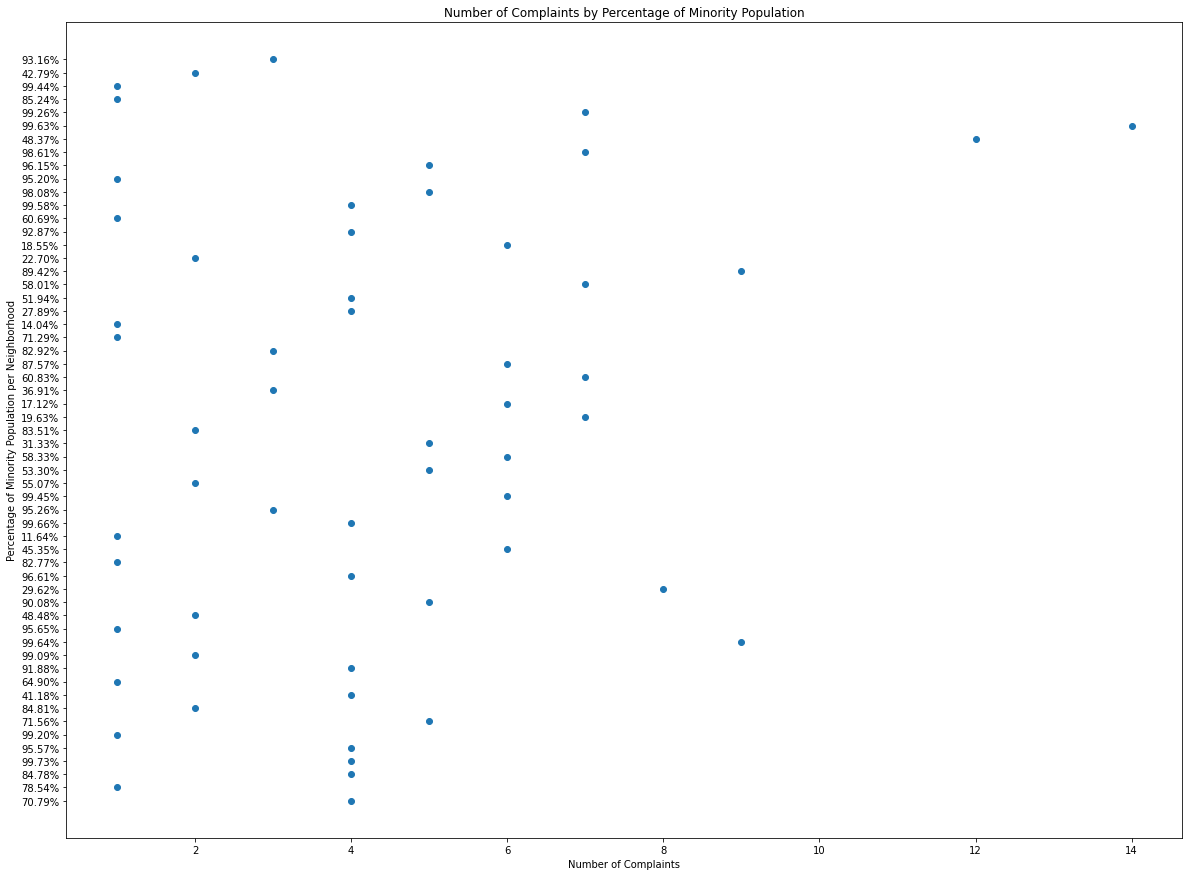

In [65]:
# Scatterplot Y-Minority %, x-Complaint Frequency
# Set up x and y values
x_values = chart_data['COMPLAINT ID']
y_values = chart_data['Minority Percentage']
# plot scatterplot
plt.figure(figsize = (20,15))
figure = plt.scatter(x_values,y_values)
#Formating
plt.ylabel('Percentage of Minority Population per Neighborhood')
plt.xlabel('Number of Complaints')
plt.title('Number of Complaints by Percentage of Minority Population')
plt.show()